In [1]:
import os
import pandas as pd
import numpy as np

In [3]:
os.getcwd()

'G:\\edwisor'

In [2]:
os.chdir("G:\edwisor")

In [4]:
data = pd.read_csv("day.csv")

In [77]:
# pre-processing 
# checking for null values

missing_value = pd.DataFrame(data.isnull().sum())

In [5]:
# So we can conclude that there is no missing value
# Outlier Analysis
# Detect Outliers

cnames = ['instant','season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']


In [81]:
for i in cnames :
    print(i)
    q75, q25 = np.percentile(data.loc[:,i], [75 ,25])
    iqr = q75-q25
    min = q25 - (float(iqr)*1.5)
    max = q75 - (float(iqr)*1.5)
    out_low = data[data.loc[:,i]<min]
    out_high = data[data.loc[:,i]>max]
    

instant
season
yr
mnth
holiday
weekday
workingday
weathersit
temp
atemp
hum
windspeed
casual
registered
cnt


In [82]:
print(out_low)
print(out_high)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
19        20  2011-01-20       1   0     1        0        4           1   
24        25  2011-01-25       1   0     1        0        2           1   
44        45  2011-02-14       1   0     2        0        1           1   
45        46  2011-02-15       1   0     2        0        2           1   
46        47  2011-02-16       1   0     2        0        3           1   
47        48  2011-02-17       1   0     2        0        4           1   
48        49  2011-02-18       1   0     2        0        5           1   
50        51  2011-02-20       1   0     2        0        0           0   
53        54  2011-02-23       1   0     2        0        3           1   
54        55  2011-02-24       1   0     2        0        4           1 

In [ ]:
!pip install fancyimpute

In [12]:
!pip install matplotlib

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [11]:
# based on the results we have no outliers
# feature selection

# taking only the columns with numerical values

##Correlation analysis
#Correlation plot
#from fancyimpute import KNN   
import matplotlib.pyplot as plt

In [6]:
data_corr = data.loc[:,cnames]

In [84]:
#Generate correlation matrix
corr = data_corr.corr()


In [17]:
!pip install seaborn

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [18]:
import seaborn as sms

<function matplotlib.pyplot.show>

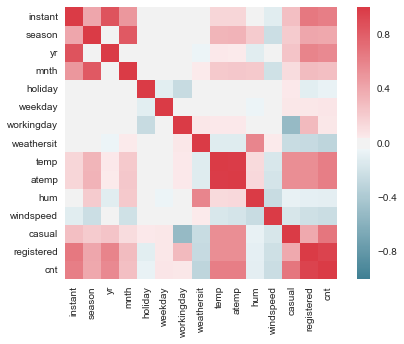

In [19]:
# Creating the heat map

import matplotlib.pyplot as plt
%matplotlib inline
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = data_corr.corr()

#Plot using seaborn library
sms.heatmap(corr, mask=py.zeros_like(corr, dtype=py.bool), cmap=sms.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show

In [86]:
# As per the heat map we see high correlation between instant and yr, month and season, temp and atemp, casual and registered
# Hence we remove instant season atemp hum casual and registered

data_new = data_corr.drop(['atemp','instant','season','hum','registered','casual'],axis=1)

In [22]:
# Model Development

# Linear Regression

!pip install sklearn.crossvalidation

  Could not find a version that satisfies the requirement sklearn.crossvalidation (from versions: )
No matching distribution found for sklearn.crossvalidation
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [11]:
from sklearn.model_selection import train_test_split

In [88]:
# split the variables into train and test

train,test = train_test_split(data_new, test_size =0.4)

In [25]:
!pip install scipy

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [26]:
!pip install statsmodels

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [90]:
import statsmodels.api as sm

C:\Users\NIL\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [91]:
# fitting into your model

model = sm.OLS(train.iloc[:,8], train.iloc[:,0:8]).fit()

In [92]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     1300.
Date:                Sun, 08 Jul 2018   Prob (F-statistic):          9.00e-296
Time:                        23:52:07   Log-Likelihood:                -3632.5
No. Observations:                 438   AIC:                             7281.
Df Residuals:                     430   BIC:                             7314.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr          2165.3505     92.183     23.490      0.000    1984.165    2346.536
mnth         105.7544     13.957      7.577      0.000      78.321     133.188
holiday     -646.0216    294.251     -2.195      0.029   -1224.372     -67.672
weekday      103.0084     22.415      4.596      0.000      58.952     147.065
workingday   261.3937    100.763      2.594      0.010      63.345     459.442
weathersit  -537.3590     76.602     -7.015      0.000    -687.919    -386.799
temp        6388.8328    233.855     27.320      0.000    5929.191    6848.474
windspeed  -1157.1203    505.575     -2.289      0.023   -2150.825    -163.415
==============================================================================
Omnibus:                       63.766   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.900
Skew:                          -0.846   Prob(JB):                     6.80e-26
Kurtosis:                       4.868   Cond. No.                         87.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
predictions_LR = model.predict(test.iloc[:,0:8])

In [12]:
# Creating function MAPE

def MAPE(y_true,y_pred):
    mape = np.mean(np.abs((y_true-y_pred)/y_true))*100
    return mape
    

In [ ]:
# Accuracy
MAPE(test.iloc[:,8], predictions_LR)

In [ ]:
# R^ square is 96 %
# 22.50 percent with 40 percent test data


In [ ]:
# KNN Regression

# Normalization

In [97]:
 cnames1 = ['mnth','yr','holiday','weekday','workingday','temp','weathersit','windspeed','cnt']
   
    
#cnames1= list(data_new.columns.values)

In [98]:
cnames1
#summary(cnames1)

['mnth',
 'yr',
 'holiday',
 'weekday',
 'workingday',
 'temp',
 'weathersit',
 'windspeed',
 'cnt']

In [7]:
for i in cnames:
    print(i)
    data_corr[i] = (data_corr[i] - min(data_corr[i]))/(max(data_corr[i]) - min(data_corr[i]))

instant
season
yr
mnth
holiday
weekday
workingday
weathersit
temp
atemp
hum
windspeed
casual
registered
cnt


In [8]:
data_new = data_corr.drop(['atemp','instant','season','hum','registered','casual'],axis=1)

In [9]:
# fitting into knn regressor

from sklearn.neighbors import KNeighborsRegressor

# atemp,instant,season,hum,registered,casual

In [29]:
# split the variables into train and test

X = data_new.values[:, 0:8]
Y = data_new.values[:,8]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [32]:
KNN_model = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

In [33]:
# predicting the values

KNN_Predictions = KNN_model.predict(X_test)

In [ ]:
MAPE(y_test, KNN_Predictions)

In [ ]:
# The MAPE is 20.13 when k=5
# So as we can see the MAPE is less for KNN so we will select the KNN regression model.